Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [ ]:
!pip install pymystem3

In [ ]:
import re

In [ ]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt_tab')

In [ ]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [ ]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

In [ ]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

In [ ]:
print(text_analyzed[4])

In [ ]:
print(type(text_analyzed))

Можно делать отдельные вещи:

In [ ]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

Можно склеить всё в один лемматизированный текст:

In [ ]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

In [ ]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

In [ ]:
text_analyzed[0] #чтобы понять, что происходит наверху

Функция, чтобы прикрепить частеречные теги к словам

In [ ]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [ ]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

Можно посмотреть предсказания для отдельных слов:

In [ ]:
mystem.analyze('стекла')

In [ ]:
mystem.analyze('стали')

In [ ]:
mystem.analyze('стекла и стали нам не хватает')

In [ ]:
mystem.analyze('кринжевать')

In [ ]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [ ]:
mystem.analyze('мы стали более лучше одеваться')

In [ ]:
mystem.analyze('сплав стали')

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [ ]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [ ]:
nltk.download('universal_tagset')

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

In [ ]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

In [ ]:
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

Можно "подклеить" для удобства тэги к слову.

In [ ]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

In [ ]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

In [ ]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

Сколько у нас частей речи определенного вида?

In [ ]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

In [ ]:
from nltk import FreqDist

In [ ]:
nltk.download("stopwords")

In [ ]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

In [ ]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [ ]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


In [ ]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

In [1]:

import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from pymystem3 import Mystem
import nltk

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('universal_tagset')
nltk.download('stopwords')
nltk.download('wordnet')

mystem = Mystem()

eng_text = """The Vampire Diaries is an American supernatural teen drama television series developed by Kevin Williamson and Julie Plec, based on the book series of the same name written by L. J. Smith. The series premiered on the CW on September 10, 2009, and concluded on March 10, 2017, having aired 171 episodes over eight seasons.
The first season averaged 3.60 million viewers. It became the most-watched series on the network before being surpassed by Arrow. The show has received numerous award nominations, winning four People's Choice Awards and thirty Teen Choice Awards.
In April 2015, lead actress Nina Dobrev, who played Elena Gilbert, confirmed that she would be leaving the show after its sixth season. Dobrev returned to record a voice-over for the seventh-season finale and returned as a guest star in the series finale. In March 2016, the CW renewed the series for an eighth season, but in July of that year announced that the eighth season, consisting of 16 episodes, would be the show's last.
The concepts and characters developed in the series served to launch a media franchise that includes other television series, web series, novels and comic books. The television series The Originals (2013–2018) – which also aired on the CW – was the first major entry in this collection of connected works, followed by a spin-off of The Originals entitled Legacies (2018–2022), which aired on the CW as well. The Vampire Diaries significantly influenced the supernatural teen drama genre, contributing to a surge in vampire-themed media during the late 2000s and early 2010s.
The series is set in the fictional town of Mystic Falls, Virginia, a town charged with supernatural history. It follows the life of Elena Gilbert, a teenage girl who has just lost both parents in a car crash, as she falls in love with a 162-year-old vampire named Stefan Salvatore, who she thinks is just a normal human. Their relationship becomes increasingly intricate as Stefan's mysterious older brother Damon Salvatore returns to Mystic Falls with a plan to bring back their past love, Katherine Pierce, who is Elena's doppelgänger.
Although Damon initially holds a grudge against his brother for forcing him to become a vampire, he later reconciles with Stefan, but their relationship is challenged when they both fall in love with Elena, creating a love triangle among the three. Both brothers attempt to protect Elena as they face various villains and threats to their town, including Katherine, while trying to protect their identity as vampires. Throughout the series, the Salvatore brothers’ pasts and the town's history is slowly revealed through flashbacks.
Additional storylines revolve around the other inhabitants of the town, most notably Elena's younger brother Jeremy Gilbert and aunt Jenna Sommers, her best friends Bonnie Bennett and Caroline Forbes, their mutual friends Matt Donovan and Tyler Lockwood, Matt's older sister Vicki Donovan, and their history teacher and vampire hunter Alaric Saltzman. The town's politics are orchestrated by the Founders' council, comprising descendants of the founding families: the Fells, the Forbes, the Lockwoods, the Gilberts, and the Salvatores. They guard the town mainly from vampires and other supernatural threats such as werewolves, witches, hybrids (cross-breeds of two or more different supernatural beings), and ghosts.
Initially, Kevin Williamson had little interest in developing the series, as he found the premise too similar to the Twilight novels. However, at the urging of Julie Plec, he began to read the books. He started to become intrigued by the story: "I began to realize that it was a story about a small town, about that town's underbelly and about what lurks under the surface." Williamson has stated the town's story will be the main focus of the series rather than high school.
On February 6, 2009, Variety announced that the CW had green-lit the pilot for The Vampire Diaries with Williamson and Julie Plec set as the head writers, executive producers, and showrunners. On May 19, 2009, the series was officially ordered for the 2009–2010 season.
The pilot episode was filmed in Vancouver, British Columbia. However, the rest of the seasons have been filmed in Covington, Georgia (which doubles as the show's fictional small town of Mystic Falls, Virginia) and various other communities around Greater Atlanta to take advantage of local tax incentives. On the morning of May 10, 2012, a fire broke out in the building on Clark Street in Covington that was used as the setting for Mystic Grill on the show."""

rus_text = """Павел Петрович Кирсанов воспитывался сперва дома, так же как и младший брат его Николай, потом в пажеском корпусе. Он с детства отличался замечательною красотой; к тому же он был самоуверен, немного насмешлив и как-то забавно желчен — он не мог не нравиться. Он начал появляться всюду, как только вышел в офицеры. Его носили на руках, и он сам себя баловал, даже дурачился, даже ломался; но и это к нему шло. Женщины от него с ума сходили, мужчины называли его фатом и втайне завидовали ему. Он жил, как уже сказано, на одной квартире с братом, которого любил искренно, хотя нисколько на него не походил. Николай Петрович прихрамывал, черты имел маленькие, приятные, но несколько грустные, небольшие черные глаза и мягкие жидкие волосы; он охотно ленился, но и читал охотно, и боялся общества. Павел Петрович ни одного вечера не проводил дома, славился смелостию и ловкостию (он ввел было гимнастику в моду между светскою молодежью) и прочел всего пять, шесть французских книг. На двадцать восьмом году от роду он уже был капитаном; блестящая карьера ожидала его. Вдруг все изменилось.В то время в петербургском свете изредка появлялась женщина, которую не забыли до сих пор, княгиня Р. У ней был благовоспитанный и приличный, но глуповатый муж и не было детей. Она внезапно уезжала за границу, внезапно возвращалась в Россию, вообще вела странную жизнь. Она слыла за легкомысленную кокетку, с увлечением предавалась всякого рода удовольствиям, танцевала до упаду, хохотала и шутила с молодыми людьми, которых принимала перед обедом в полумраке гостиной, а по ночам плакала и молилась, не находила нигде покою и часто до самого утра металась по комнате, тоскливо ломая руки, или сидела, вся бледная и холодная, над псалтырем. День наставал, и она снова превращалась в светскую даму, снова выезжала, смеялась, болтала и точно бросалась навстречу всему, что могло доставить ей малейшее развлечение. Она была удивительно сложена; ее коса золотого цвета и тяжелая, как золото, падала ниже колен, но красавицей ее никто бы не назвал; во всем ее лице только и было хорошего, что глаза, и даже не самые глаза — они были невелики и серы, — но взгляд их, быстрый, глубокий, беспечный до удали и задумчивый до уныния, — загадочный взгляд. Что-то необычайное светилось в нем даже тогда, когда язык ее лепетал самые пустые речи. Одевалась она изысканно. Павел Петрович встретил ее на одном бале, протанцевал с ней мазурку, в течение которой она не сказала ни одного путного слова, и влюбился в нее страстно. Привыкший к победам, он и тут скоро достиг своей цели; но легкость торжества не охладила его. Напротив: он еще мучительнее, еще крепче привязался к этой женщине, в которой даже тогда, когда она отдавалась безвозвратно, все еще как будто оставалось что-то заветное и недоступное, куда никто не мог проникнуть. Что гнездилось в этой душе — Бог весть! Казалось, она находилась во власти каких-то тайных, для нее самой неведомых сил; они играли ею, как хотели; ее небольшой ум не мог сладить с их прихотью. Все ее поведение представляло ряд несообразностей; единственные письма, которые могли бы возбудить справедливые подозрения ее мужа, она написала к человеку почти ей чужому, а любовь ее отзывалась печалью; она уже не смеялась и не шутила с тем, кого избирала, и слушала его и глядела на него с недоумением. Иногда, большею частью внезапно, это недоумение переходило в холодный ужас; лицо ее принимало выражение мертвенное и дикое; она запиралась у себя в спальне, и горничная ее могла слышать, припав ухом к замку, ее глухие рыдания. Не раз, возвращаясь к себе домой после нежного свидания, Кирсанов чувствовал на сердце ту разрывающую и горькую досаду, которая поднимается в сердце после окончательной неудачи. «Чего же хочу я еще?» — спрашивал он себя, а сердце все ныло. Он однажды подарил ей кольцо с вырезанным на камне сфинксом.
Тяжело было Павлу Петровичу даже тогда, когда княгиня Р. его любила; но когда она охладела к нему, а это случилось довольно скоро, он чуть с ума не сошел. Он терзался и ревновал, не давал ей покою, таскался за ней повсюду; ей надоело его неотвязное преследование, и она уехала за границу. Он вышел в отставку, несмотря на просьбы приятелей, на увещания начальников, и отправился вслед за княгиней; года четыре провел он в чужих краях, то гоняясь за нею, то с намерением теряя ее из виду; он стыдился самого себя, он негодовал на свое малодушие... но ничто не помогало. Ее образ, этот непонятный, почти бессмысленный, но обаятельный образ слишком глубоко внедрился в его душу."""

print(f"Длина английского текста: {len(eng_text)} символов")
print(f"Длина русского текста: {len(rus_text)} символов")

def process_mystem_analysis(analysis_results, stop_words=None):
    result_tokens = []
    for item in analysis_results:
        text = item.get("text", "").lower().strip()
        if not text or not text.isalpha():
            continue
        if stop_words and text in stop_words:
            continue
        if item.get("analysis"):
            first_analysis = item["analysis"][0]
            gr = first_analysis.get("gr")
            if gr:
                pos_tag = gr.split(",")[0].split("=")[0]
                result_tokens.append(f"{text}_{pos_tag}")
            else:
                result_tokens.append(text)
    return result_tokens

def plot_freqdist(ax, freq_dist, n, title):
    words, freqs = zip(*freq_dist.most_common(n))
    ax.barh(range(n), freqs)
    ax.set_yticks(range(n))
    ax.set_yticklabels(words)
    ax.invert_yaxis()
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

stop_words_eng = set(stopwords.words("english"))
stop_words_rus = set(stopwords.words("russian"))

print("\n" + "="*50)
print("ТЕКСТ НА АНГЛИЙСКОМ")
print("="*50)

# 1 способ
tokens_eng = [
    w for w in word_tokenize(eng_text.lower())
    if w.isalpha() and w not in stop_words_eng
]
print(f"Способ 1: {len(tokens_eng)} простых токенов")
freq_dist_eng1 = FreqDist(tokens_eng)
print("Топ-10 простых токенов:")
for word, freq in freq_dist_eng1.most_common(10):
    print(f"  {word}: {freq}")

# 2 способ
tagged_eng = nltk.pos_tag(tokens_eng, tagset="universal")
tagged_list_eng = ["_".join(pair) for pair in tagged_eng]
print(f"\nСпособ 2: {len(tagged_list_eng)} токенов с частью речи")
freq_dist_eng2 = FreqDist(tagged_list_eng)
print("Топ-10 токенов с частью речи:")
for word, freq in freq_dist_eng2.most_common(10):
    print(f"  {word}: {freq}")

# 3 способ
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
lemmas_eng = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens_eng]
print(f"\nСпособ 3: {len(lemmas_eng)} лемм/стемм")
freq_dist_eng3 = FreqDist(lemmas_eng)
print("Топ-10 лемм/стемм:")
for word, freq in freq_dist_eng3.most_common(10):
    print(f"  {word}: {freq}")

print("\n" + "="*50)
print("РУССКИЙ ТЕКСТ")
print("="*50)

# 1
tokens_rus = [
    w for w in word_tokenize(rus_text.lower())
    if w.isalpha() and w not in stop_words_rus
]
print(f"Способ 1: {len(tokens_rus)} простых токенов")
freq_dist_rus1 = FreqDist(tokens_rus)
print("Топ-10 простых токенов:")
for word, freq in freq_dist_rus1.most_common(10):
    print(f"  {word}: {freq}")

# 2
text_analyzed_rus = mystem.analyze(rus_text)
tagged_tokens_rus = process_mystem_analysis(text_analyzed_rus, stop_words=stop_words_rus)
print(f"\nСпособ 2: {len(tagged_tokens_rus)} токенов с частью речи")
freq_dist_rus2 = FreqDist(tagged_tokens_rus)
print("Топ-10 токенов с частью речи:")
for word, freq in freq_dist_rus2.most_common(10):
    print(f"  {word}: {freq}")

# 3
lemmatized_text = mystem.lemmatize(rus_text)
lemmas_rus = [
    w for w in lemmatized_text
    if w.isalpha() and w not in stop_words_rus
]
print(f"\nСпособ 3: {len(lemmas_rus)} лемм")
freq_dist_rus3 = FreqDist(lemmas_rus)
print("Топ-10 лемм:")
for word, freq in freq_dist_rus3.most_common(10):
    print(f"  {word}: {freq}")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

plot_freqdist(axes[0, 0], freq_dist_eng1, 30, "Английский: Простые токены (топ-30)")
plot_freqdist(axes[0, 1], freq_dist_eng2, 30, "Английский: С частью речи (топ-30)")
plot_freqdist(axes[0, 2], freq_dist_eng3, 30, "Английский: Леммы/стеммы (топ-30)")

plot_freqdist(axes[1, 0], freq_dist_rus1, 30, "Русский: Простые токены (топ-30)")
plot_freqdist(axes[1, 1], freq_dist_rus2, 30, "Русский: С частью речи (топ-30)")
plot_freqdist(axes[1, 2], freq_dist_rus3, 30, "Русский: Леммы (топ-30)")

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("СРАВНЕНИЕ ТОП-30 КЛЮЧЕВЫХ СЛОВ")
print("="*50)

def compare_top_words(freq1, freq2, freq3, labels):
    """Сравнивает топ-30 трех методов"""
    top1 = set([word for word, _ in freq1.most_common(30)])
    top2 = set([word for word, _ in freq2.most_common(30)])
    top3 = set([word for word, _ in freq3.most_common(30)])

    print(f"\nСовпадения между методами:")
    print(f"  {labels[0]} и {labels[1]}: {len(top1 & top2)} слов")
    print(f"  {labels[0]} и {labels[2]}: {len(top1 & top3)} слов")
    print(f"  {labels[1]} и {labels[2]}: {len(top2 & top3)} слов")

    unique_to_first = top1 - top2 - top3
    print(f"\nУникальные слова только в {labels[0]}: {len(unique_to_first)}")

print("\nАнглийский текст:")
compare_top_words(freq_dist_eng1, freq_dist_eng2, freq_dist_eng3,
                  ["токены", "тэги", "леммы"])

print("\nРусский текст:")
compare_top_words(freq_dist_rus1, freq_dist_rus2, freq_dist_rus3,
                  ["токены", "тэги", "леммы"])

ModuleNotFoundError: No module named 'pymystem3'

In [2]:
# Автоматическая установка необходимых библиотек
import sys
import subprocess
import importlib

def install_if_needed(package_name, import_name=None):
    """Устанавливает пакет, если он не установлен"""
    if import_name is None:
        import_name = package_name

    try:
        importlib.import_module(import_name)
        print(f"✓ {package_name} уже установлен")
        return True
    except ImportError:
        print(f"Установка {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            print(f"✓ {package_name} успешно установлен")
            return True
        except subprocess.CalledProcessError:
            print(f"✗ Не удалось установить {package_name}")
            return False

# Устанавливаем необходимые библиотеки
install_if_needed("matplotlib")
install_if_needed("pymystem3")
install_if_needed("nltk")

# Теперь импортируем все библиотеки
import matplotlib.pyplot as plt
import nltk

# Скачиваем необходимые ресурсы NLTK
print("Загрузка ресурсов NLTK...")
nltk_resources = [
    'punkt',
    'averaged_perceptron_tagger',
    'universal_tagset',
    'stopwords',
    'wordnet'
]

for resource in nltk_resources:
    try:
        nltk.download(resource, quiet=True)
        print(f"✓ {resource}")
    except Exception as e:
        print(f"✗ {resource}: {e}")

# Импортируем остальные модули
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from pymystem3 import Mystem

# Инициализируем Mystem
try:
    mystem = Mystem()
    print("✓ Mystem инициализирован успешно")
except Exception as e:
    print(f"✗ Ошибка инициализации Mystem: {e}")
    mystem = None

# Тексты для анализа
eng_text = """The Vampire Diaries is an American supernatural teen drama television series developed by Kevin Williamson and Julie Plec, based on the book series of the same name written by L. J. Smith. The series premiered on the CW on September 10, 2009, and concluded on March 10, 2017, having aired 171 episodes over eight seasons.
The first season averaged 3.60 million viewers. It became the most-watched series on the network before being surpassed by Arrow. The show has received numerous award nominations, winning four People's Choice Awards and thirty Teen Choice Awards.
In April 2015, lead actress Nina Dobrev, who played Elena Gilbert, confirmed that she would be leaving the show after its sixth season. Dobrev returned to record a voice-over for the seventh-season finale and returned as a guest star in the series finale. In March 2016, the CW renewed the series for an eighth season, but in July of that year announced that the eighth season, consisting of 16 episodes, would be the show's last.
The concepts and characters developed in the series served to launch a media franchise that includes other television series, web series, novels and comic books. The television series The Originals (2013–2018) – which also aired on the CW – was the first major entry in this collection of connected works, followed by a spin-off of The Originals entitled Legacies (2018–2022), which aired on the CW as well. The Vampire Diaries significantly influenced the supernatural teen drama genre, contributing to a surge in vampire-themed media during the late 2000s and early 2010s.
The series is set in the fictional town of Mystic Falls, Virginia, a town charged with supernatural history. It follows the life of Elena Gilbert, a teenage girl who has just lost both parents in a car crash, as she falls in love with a 162-year-old vampire named Stefan Salvatore, who she thinks is just a normal human. Their relationship becomes increasingly intricate as Stefan's mysterious older brother Damon Salvatore returns to Mystic Falls with a plan to bring back their past love, Katherine Pierce, who is Elena's doppelgänger.
Although Damon initially holds a grudge against his brother for forcing him to become a vampire, he later reconciles with Stefan, but their relationship is challenged when they both fall in love with Elena, creating a love triangle among the three. Both brothers attempt to protect Elena as they face various villains and threats to their town, including Katherine, while trying to protect their identity as vampires. Throughout the series, the Salvatore brothers’ pasts and the town's history is slowly revealed through flashbacks.
Additional storylines revolve around the other inhabitants of the town, most notably Elena's younger brother Jeremy Gilbert and aunt Jenna Sommers, her best friends Bonnie Bennett and Caroline Forbes, their mutual friends Matt Donovan and Tyler Lockwood, Matt's older sister Vicki Donovan, and their history teacher and vampire hunter Alaric Saltzman. The town's politics are orchestrated by the Founders' council, comprising descendants of the founding families: the Fells, the Forbes, the Lockwoods, the Gilberts, and the Salvatores. They guard the town mainly from vampires and other supernatural threats such as werewolves, witches, hybrids (cross-breeds of two or more different supernatural beings), and ghosts.
Initially, Kevin Williamson had little interest in developing the series, as he found the premise too similar to the Twilight novels. However, at the urging of Julie Plec, he began to read the books. He started to become intrigued by the story: "I began to realize that it was a story about a small town, about that town's underbelly and about what lurks under the surface." Williamson has stated the town's story will be the main focus of the series rather than high school.
On February 6, 2009, Variety announced that the CW had green-lit the pilot for The Vampire Diaries with Williamson and Julie Plec set as the head writers, executive producers, and showrunners. On May 19, 2009, the series was officially ordered for the 2009–2010 season.
The pilot episode was filmed in Vancouver, British Columbia. However, the rest of the seasons have been filmed in Covington, Georgia (which doubles as the show's fictional small town of Mystic Falls, Virginia) and various other communities around Greater Atlanta to take advantage of local tax incentives. On the morning of May 10, 2012, a fire broke out in the building on Clark Street in Covington that was used as the setting for Mystic Grill on the show."""

rus_text = """Павел Петрович Кирсанов воспитывался сперва дома, так же как и младший брат его Николай, потом в пажеском корпусе. Он с детства отличался замечательною красотой; к тому же он был самоуверен, немного насмешлив и как-то забавно желчен — он не мог не нравиться. Он начал появляться всюду, как только вышел в офицеры. Его носили на руках, и он сам себя баловал, даже дурачился, даже ломался; но и это к нему шло. Женщины от него с ума сходили, мужчины называли его фатом и втайне завидовали ему. Он жил, как уже сказано, на одной квартире с братом, которого любил искренно, хотя нисколько на него не походил. Николай Петрович прихрамывал, черты имел маленькие, приятные, но несколько грустные, небольшие черные глаза и мягкие жидкие волосы; он охотно ленился, но и читал охотно, и боялся общества. Павел Петрович ни одного вечера не проводил дома, славился смелостию и ловкостию (он ввел было гимнастику в моду между светскою молодежью) и прочел всего пять, шесть французских книг. На двадцать восьмом году от роду он уже был капитаном; блестящая карьера ожидала его. Вдруг все изменилось.В то время в петербургском свете изредка появлялась женщина, которую не забыли до сих пор, княгиня Р. У ней был благовоспитанный и приличный, но глуповатый муж и не было детей. Она внезапно уезжала за границу, внезапно возвращалась в Россию, вообще вела странную жизнь. Она слыла за легкомысленную кокетку, с увлечением предавалась всякого рода удовольствиям, танцевала до упаду, хохотала и шутила с молодыми людьми, которых принимала перед обедом в полумраке гостиной, а по ночам плакала и молилась, не находила нигде покою и часто до самого утра металась по комнате, тоскливо ломая руки, или сидела, вся бледная и холодная, над псалтырем. День наставал, и она снова превращалась в светскую даму, снова выезжала, смеялась, болтала и точно бросалась навстречу всему, что могло доставить ей малейшее развлечение. Она была удивительно сложена; ее коса золотого цвета и тяжелая, как золото, падала ниже колен, но красавицей ее никто бы не назвал; во всем ее лице только и было хорошего, что глаза, и даже не самые глаза — они были невелики и серы, — но взгляд их, быстрый, глубокий, беспечный до удали и задумчивый до уныния, — загадочный взгляд. Что-то необычайное светилось в нем даже тогда, когда язык ее лепетал самые пустые речи. Одевалась она изысканно. Павел Петрович встретил ее на одном бале, протанцевал с ней мазурку, в течение которой она не сказала ни одного путного слова, и влюбился в нее страстно. Привыкший к победам, он и тут скоро достиг своей цели; но легкость торжества не охладила его. Напротив: он еще мучительнее, еще крепче привязался к этой женщине, в которой даже тогда, когда она отдавалась безвозвратно, все еще как будто оставалось что-то заветное и недоступное, куда никто не мог проникнуть. Что гнездилось в этой душе — Бог весть! Казалось, она находилась во власти каких-то тайных, для нее самой неведомых сил; они играли ею, как хотели; ее небольшой ум не мог сладить с их прихотью. Все ее поведение представляло ряд несообразностей; единственные письма, которые могли бы возбудить справедливые подозрения ее мужа, она написала к человеку почти ей чужому, а любовь ее отзывалась печалью; она уже не смеялась и не шутила с тем, кого избирала, и слушала его и глядела на него с недоумением. Иногда, большею частью внезапно, это недоумение переходило в холодный ужас; лицо ее принимало выражение мертвенное и дикое; она запиралась у себя в спальне, и горничная ее могла слышать, припав ухом к замку, ее глухие рыдания. Не раз, возвращаясь к себе домой после нежного свидания, Кирсанов чувствовал на сердце ту разрывающую и горькую досаду, которая поднимается в сердце после окончательной неудачи. «Чего же хочу я еще?» — спрашивал он себя, а сердце все ныло. Он однажды подарил ей кольцо с вырезанным на камне сфинксом.
Тяжело было Павлу Петровичу даже тогда, когда княгиня Р. его любила; но когда она охладела к нему, а это случилось довольно скоро, он чуть с ума не сошел. Он терзался и ревновал, не давал ей покою, таскался за ней повсюду; ей надоело его неотвязное преследование, и она уехала за границу. Он вышел в отставку, несмотря на просьбы приятелей, на увещания начальников, и отправился вслед за княгиней; года четыре провел он в чужих краях, то гоняясь за нею, то с намерением теряя ее из виду; он стыдился самого себя, он негодовал на свое малодушие... но ничто не помогало. Ее образ, этот непонятный, почти бессмысленный, но обаятельный образ слишком глубоко внедрился в его душу."""

print(f"Длина английского текста: {len(eng_text)} символов")
print(f"Длина русского текста: {len(rus_text)} символов")

def process_mystem_analysis(analysis_results, stop_words=None):
    result_tokens = []
    for item in analysis_results:
        text = item.get("text", "").lower().strip()
        if not text or not text.isalpha():
            continue
        if stop_words and text in stop_words:
            continue
        if item.get("analysis"):
            first_analysis = item["analysis"][0]
            gr = first_analysis.get("gr")
            if gr:
                pos_tag = gr.split(",")[0].split("=")[0]
                result_tokens.append(f"{text}_{pos_tag}")
            else:
                result_tokens.append(text)
    return result_tokens

def plot_freqdist(ax, freq_dist, n, title):
    words, freqs = zip(*freq_dist.most_common(n))
    ax.barh(range(n), freqs)
    ax.set_yticks(range(n))
    ax.set_yticklabels(words)
    ax.invert_yaxis()
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

# Получаем стоп-слова
try:
    stop_words_eng = set(stopwords.words("english"))
    print(f"✓ Загружено {len(stop_words_eng)} английских стоп-слов")
except:
    # Базовый список английских стоп-слов
    stop_words_eng = {'a', 'an', 'the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'shall', 'should', 'may', 'might', 'must', 'can', 'could', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them', 'my', 'your', 'his', 'its', 'our', 'their'}
    print(f"✓ Используется базовый список из {len(stop_words_eng)} английских стоп-слов")

try:
    stop_words_rus = set(stopwords.words("russian"))
    print(f"✓ Загружено {len(stop_words_rus)} русских стоп-слов")
except:
    # Базовый список русских стоп-слов
    stop_words_rus = {'и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем', 'хорошо', 'свою', 'этой', 'перед', 'иногда', 'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 'всегда', 'конечно', 'всю', 'между'}
    print(f"✓ Используется базовый список из {len(stop_words_rus)} русских стоп-слов")

print("\n" + "="*50)
print("ТЕКСТ НА АНГЛИЙСКОМ")
print("="*50)

# 1 способ: простые токены
tokens_eng = [
    w for w in word_tokenize(eng_text.lower())
    if w.isalpha() and w not in stop_words_eng
]
print(f"Способ 1: {len(tokens_eng)} простых токенов")
freq_dist_eng1 = FreqDist(tokens_eng)
print("Топ-10 простых токенов:")
for word, freq in freq_dist_eng1.most_common(10):
    print(f"  {word}: {freq}")

# 2 способ: токены с частями речи
try:
    tagged_eng = nltk.pos_tag(tokens_eng, tagset="universal")
    tagged_list_eng = ["_".join(pair) for pair in tagged_eng]
    print(f"\nСпособ 2: {len(tagged_list_eng)} токенов с частью речи")
    freq_dist_eng2 = FreqDist(tagged_list_eng)
    print("Топ-10 токенов с частью речи:")
    for word, freq in freq_dist_eng2.most_common(10):
        print(f"  {word}: {freq}")
except Exception as e:
    print(f"\n✗ Способ 2 (токены с POS): {e}")
    freq_dist_eng2 = FreqDist([])

# 3 способ: леммы и стеммы
try:
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    lemmas_eng = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens_eng]
    print(f"\nСпособ 3: {len(lemmas_eng)} лемм/стемм")
    freq_dist_eng3 = FreqDist(lemmas_eng)
    print("Топ-10 лемм/стемм:")
    for word, freq in freq_dist_eng3.most_common(10):
        print(f"  {word}: {freq}")
except Exception as e:
    print(f"\n✗ Способ 3 (леммы/стеммы): {e}")
    freq_dist_eng3 = FreqDist([])

print("\n" + "="*50)
print("РУССКИЙ ТЕКСТ")
print("="*50)

# 1 способ: простые токены
tokens_rus = [
    w for w in word_tokenize(rus_text.lower())
    if w.isalpha() and w not in stop_words_rus
]
print(f"Способ 1: {len(tokens_rus)} простых токенов")
freq_dist_rus1 = FreqDist(tokens_rus)
print("Топ-10 простых токенов:")
for word, freq in freq_dist_rus1.most_common(10):
    print(f"  {word}: {freq}")

# 2 способ: Mystem анализ
if mystem:
    try:
        text_analyzed_rus = mystem.analyze(rus_text)
        tagged_tokens_rus = process_mystem_analysis(text_analyzed_rus, stop_words=stop_words_rus)
        print(f"\nСпособ 2: {len(tagged_tokens_rus)} токенов с частью речи")
        freq_dist_rus2 = FreqDist(tagged_tokens_rus)
        print("Топ-10 токенов с частью речи:")
        for word, freq in freq_dist_rus2.most_common(10):
            print(f"  {word}: {freq}")
    except Exception as e:
        print(f"\n✗ Способ 2 (Mystem анализ): {e}")
        freq_dist_rus2 = FreqDist([])
else:
    print("\n✗ Способ 2: Mystem не доступен")
    freq_dist_rus2 = FreqDist([])

# 3 способ: лемматизация
if mystem:
    try:
        lemmatized_text = mystem.lemmatize(rus_text)
        lemmas_rus = [
            w for w in lemmatized_text
            if w.isalpha() and w not in stop_words_rus
        ]
        print(f"\nСпособ 3: {len(lemmas_rus)} лемм")
        freq_dist_rus3 = FreqDist(lemmas_rus)
        print("Топ-10 лемм:")
        for word, freq in freq_dist_rus3.most_common(10):
            print(f"  {word}: {freq}")
    except Exception as e:
        print(f"\n✗ Способ 3 (лемматизация): {e}")
        freq_dist_rus3 = FreqDist([])
else:
    print("\n✗ Способ 3: Mystem не доступен")
    freq_dist_rus3 = FreqDist([])

# Создаем графики
try:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    if len(freq_dist_eng1) > 0:
        plot_freqdist(axes[0, 0], freq_dist_eng1, min(30, len(freq_dist_eng1)), "Английский: Простые токены (топ-30)")
    else:
        axes[0, 0].text(0.5, 0.5, "Нет данных", ha='center', va='center')
        axes[0, 0].set_title("Английский: Простые токены (топ-30)")

    if len(freq_dist_eng2) > 0:
        plot_freqdist(axes[0, 1], freq_dist_eng2, min(30, len(freq_dist_eng2)), "Английский: С частью речи (топ-30)")
    else:
        axes[0, 1].text(0.5, 0.5, "Нет данных", ha='center', va='center')
        axes[0, 1].set_title("Английский: С частью речи (топ-30)")

    if len(freq_dist_eng3) > 0:
        plot_freqdist(axes[0, 2], freq_dist_eng3, min(30, len(freq_dist_eng3)), "Английский: Леммы/стеммы (топ-30)")
    else:
        axes[0, 2].text(0.5, 0.5, "Нет данных", ha='center', va='center')
        axes[0, 2].set_title("Английский: Леммы/стеммы (топ-30)")

    if len(freq_dist_rus1) > 0:
        plot_freqdist(axes[1, 0], freq_dist_rus1, min(30, len(freq_dist_rus1)), "Русский: Простые токены (топ-30)")
    else:
        axes[1, 0].text(0.5, 0.5, "Нет данных", ha='center', va='center')
        axes[1, 0].set_title("Русский: Простые токены (топ-30)")

    if len(freq_dist_rus2) > 0:
        plot_freqdist(axes[1, 1], freq_dist_rus2, min(30, len(freq_dist_rus2)), "Русский: С частью речи (топ-30)")
    else:
        axes[1, 1].text(0.5, 0.5, "Нет данных", ha='center', va='center')
        axes[1, 1].set_title("Русский: С частью речи (топ-30)")

    if len(freq_dist_rus3) > 0:
        plot_freqdist(axes[1, 2], freq_dist_rus3, min(30, len(freq_dist_rus3)), "Русский: Леммы (топ-30)")
    else:
        axes[1, 2].text(0.5, 0.5, "Нет данных", ha='center', va='center')
        axes[1, 2].set_title("Русский: Леммы (топ-30)")

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"\n✗ Ошибка при создании графиков: {e}")

print("\n" + "="*50)
print("СРАВНЕНИЕ ТОП-30 КЛЮЧЕВЫХ СЛОВ")
print("="*50)

def compare_top_words(freq1, freq2, freq3, labels):
    """Сравнивает топ-30 трех методов"""
    try:
        top1 = set([word for word, _ in freq1.most_common(30)])
        top2 = set([word for word, _ in freq2.most_common(30)])
        top3 = set([word for word, _ in freq3.most_common(30)])

        print(f"\nСовпадения между методами:")
        print(f"  {labels[0]} и {labels[1]}: {len(top1 & top2)} слов")
        print(f"  {labels[0]} и {labels[2]}: {len(top1 & top3)} слов")
        print(f"  {labels[1]} и {labels[2]}: {len(top2 & top3)} слов")

        unique_to_first = top1 - top2 - top3
        print(f"\nУникальные слова только в {labels[0]}: {len(unique_to_first)}")
    except Exception as e:
        print(f"\n✗ Ошибка сравнения методов: {e}")

print("\nАнглийский текст:")
compare_top_words(freq_dist_eng1, freq_dist_eng2, freq_dist_eng3,
                  ["токены", "тэги", "леммы"])

print("\nРусский текст:")
compare_top_words(freq_dist_rus1, freq_dist_rus2, freq_dist_rus3,
                  ["токены", "тэги", "леммы"])

# Дополнительная статистика
print("\n" + "="*50)
print("СТАТИСТИКА АНАЛИЗА")
print("="*50)

print(f"\nАнглийский текст:")
print(f"  Всего слов: {len(word_tokenize(eng_text))}")
print(f"  Уникальных слов (без стоп-слов): {len(set(tokens_eng))}")
print(f"  Словарь размером: {len(freq_dist_eng1)}")

print(f"\nРусский текст:")
print(f"  Всего слов: {len(word_tokenize(rus_text))}")
print(f"  Уникальных слов (без стоп-слов): {len(set(tokens_rus))}")
print(f"  Словарь размером: {len(freq_dist_rus1)}")

✓ matplotlib уже установлен
Установка pymystem3...
✓ pymystem3 успешно установлен
✓ nltk уже установлен
Загрузка ресурсов NLTK...
✓ punkt
✓ averaged_perceptron_tagger
✓ universal_tagset
✓ stopwords
✓ wordnet


Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


✓ Mystem инициализирован успешно
Длина английского текста: 4571 символов
Длина русского текста: 4508 символов
✓ Загружено 198 английских стоп-слов
✓ Загружено 151 русских стоп-слов

ТЕКСТ НА АНГЛИЙСКОМ


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [4]:

import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Длина английского текста: 3265 символов
Длина русского текста: 3307 символов
АНГЛИЙСКИЙ ТЕКСТ
Способ 1: 618 простых токенов

Топ-10 простых токенов:
,: 51
the: 38
of: 26
.: 25
and: 19
a: 15
to: 15
our: 13
we: 10
not: 8

Способ 2: 618 токенов с POS-тегами

Топ-10 токенов с POS-тегами:
,_.: 51
the_DET: 38
of_ADP: 26
._.: 25
and_CONJ: 19
a_DET: 15
to_PRT: 15
our_PRON: 13
we_PRON: 10
not_ADV: 8

Способ 3: 368 токенов без стоп-слов

Топ-10 токенов без стоп-слов:
,: 51
.: 25
human: 4
every: 4
:: 3
world: 3
could: 3
new: 2
story: 2
next: 2

РУССКИЙ ТЕКСТ
Способ 1: 682 простых токенов

Топ-10 простых токенов:
, : 79
и: 28
в: 20
; : 16
не: 15
. : 13
что: 9
а: 8
на: 8
как: 8

Способ 2: 550 токенов с POS-тегами

Топ-10 токенов с POS-тегами:
и_CONJ: 28
в_PR: 20
не_PART: 15
что_CONJ: 8
а_CONJ: 8
на_PR: 8
с_PR: 7
же_PART: 6
все_SPRO: 6
чтобы_CONJ: 6

Способ 3: 685 лемматизированных токенов

Топ-10 лемм:
,: 83
и: 28
в: 20
;: 16
не: 15
.: 14
они: 12
что: 11
быть: 11
свой: 11

ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


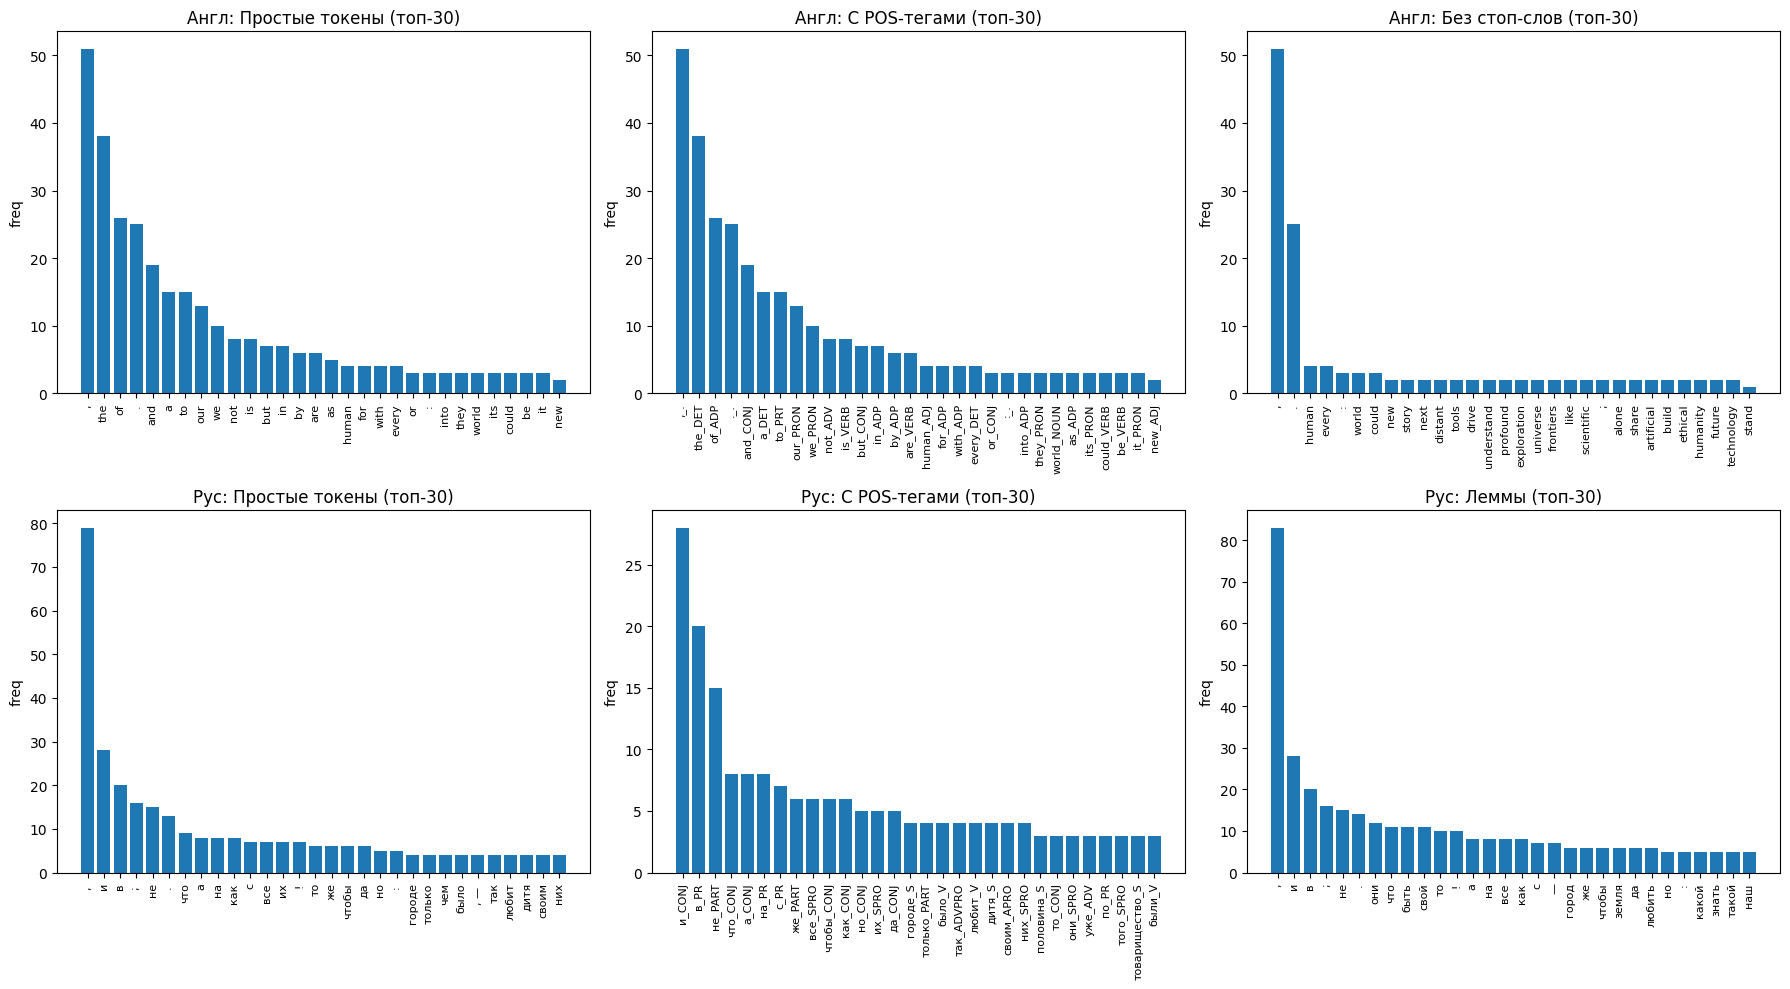


СРАВНЕНИЕ ТОП-30 КЛЮЧЕВЫХ СЛОВ

АНГЛИЙСКИЙ ТЕКСТ:
Уникальных в простые токены: 22
Уникальных в с POS-тегами: 30
Уникальных в без стоп-слов: 22
Общих для всех трех способов: 0

РУССКИЙ ТЕКСТ:
Уникальных в простые токены: 15
Уникальных в с POS-тегами: 30
Уникальных в леммы: 15
Общих для всех трех способов: 0


In [5]:
!pip install -q pymystem3 nltk


import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from pymystem3 import Mystem

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger_eng")
nltk.download("stopwords")
nltk.download("universal_tagset")

mystem = Mystem()

text_rus = """
В городе не узнал никто, что половина запорожцев выступила в погоню за татарами. С магистратской башни приметили только часовые, что потянулась часть возов за лес; но подумали, что казаки готовились сделать засаду; то же думал и французский инженер; а между тем слова кошевого не прошли даром, и в городе оказался недостаток в съестных припасах. Попробовали сделать вылазку, но половина смельчаков была тут же перебита казаками, а половина прогнана в город ни с чем. Жиды, однако же, воспользовались вылазкою и пронюхали все: куда и зачем отправились запорожцы, с какими военачальниками, и какие именно курени, и сколько их числом, и сколько было оставшихся на месте, и что они думают делать — словом, чрез несколько уже минут в городе все узнали. Полковники ободрились и готовились дать сражение. Тарас уже видел то по движенью и шуму в городе и расторопно хлопотал, строил, раздавал приказы и наказы, уставил в три табора курени, обнесши их возами в виде крепостей, — род битвы, в которой бывали непобедимы запорожцы; двум куреням повелел забраться в засаду; убил часть поля острыми кольями, изломанным оружием, обломками копьев, чтобы при случае загнать туда неприятельскую конницу. И когда все было сделано как нужно, сказал речь казакам, не для того, чтобы ободрить и освежить их, — знал, что и без того крепки они духом, — а просто самому хотелось высказать все, что было на сердце.

— Хочется мне вам сказать, панове, что такое есть наше товарищество. Вы слышали от отцов и дедов, в какой чести у всех была земля наша: и грекам дала знать себя, и с Царьграда брала червонцы, и города были пышные, и храмы, и князья, князья русского рода, свои князья, а не католические недоверки. Все взяли бусурманы, все пропало; только остались мы, сирые, да, как вдовица после крепкого мужа, сирая, так же как и мы, земля наша! Вот в какое время подали мы, товарищи, руку на братство; вот на чем стоит наше товарищество! Нет уз святее товарищества! Отец любит свое дитя, мать любит свое дитя, дитя любит отца и мать; но это не то, братцы: любит и зверь свое дитя! но породниться родством по душе, а не по крови, может один только человек. Бывали и в других землях товарищи, но таких, как в Русской земле, не было таких товарищей. Вам случалось не одному помногу пропадать на чужбине; видишь — и там люди! также Божий человек, и разговоришься с ним, как с своим; а как дойдет до того, чтобы поведать сердечное слово, — видишь: нет! умные люди, да не те; такие же люди, да не те! нет, братцы; так любить, как русская душа, любить не то чтобы умом или чем другим, а всем, чем дал Бог, что ни есть в тебе… Знаю, подло завелось теперь в земле нашей: думают только, чтобы при них были хлебные стоги, скирды, да конные табуны их, да были бы целы в погребах запечатанные меды их; перенимают черт знает какие бусурманские обычаи; гнушаются языком своим; свой с своим не хочет говорить; свой своего продает, как продают бездушную тварь на торговом рынке. Милость чужого короля, да и не короля, а паскудная милость польского магната, который желтым чеботом своим бьет их в морду, дороже для них всякого братства. Пусть же знают они все, что такое значит в Русской земле товарищество. Уже если на то пошло, чтобы умирать, так никому ж из них не доведется так умирать! никому, никому! не хватит у них на то мышиной натуры их!
"""

text_eng = """
We stand on the precipice of a new age, not defined by stone, bronze, or iron, but by silicon, data, and the boundless potential of human curiosity. The story of our species is a chronicle of reaching—first for the next valley, then the distant shore, the highest mountain, and finally, the silent stars. Today, our tools have evolved from simple levers and sails to algorithms and quantum circuits, but the fundamental drive remains unchanged: to understand our place in the cosmos and to push the boundaries of the possible.

The most profound exploration is now twofold: outward into the physical universe, and inward into the digital and biological frontiers. Robotic emissaries, like the Perseverance rover, tread the rust-colored sands of Mars, sifting for signs of ancient life, while telescopes like James Webb peer back in time to the dawn of galaxies. These ventures are not merely scientific; they are philosophical. They answer the deep-seated human need to know if we are alone, to see our world as a pale blue dot in a vast cosmic ocean, and to humble our terrestrial squabbles against the backdrop of infinity.

Simultaneously, we are mapping an inner universe. The human brain, with its intricate web of nearly 100 billion neurons, represents the most complex system we have ever encountered. Projects aiming to decode its language, to interface mind with machine, promise revolutions in medicine, communication, and our very conception of consciousness. Could we one day share a memory, a feeling, or an idea as directly as we now share a file? This journey into the self is as daring as any voyage across space.

Yet, the path of progress is not illuminated solely by triumph. Every great leap carries its shadow. The artificial intelligence we build to solve climate models, cure diseases, and optimize our world also presents existential questions about autonomy, bias, and control. The biotechnology that could extend our lifespans and eradicate genetic disorders forces us to confront profound ethical dilemmas about equity and the nature of humanity itself. Exploration has always been risky; the new frontiers are no different. They demand not just technical brilliance, but wisdom, foresight, and a robust ethical compass.

The future will be written not by technology alone, but by the choices we make in wielding it. It is a narrative still being composed, a canvas we paint with every line of code, every scientific inquiry, and every societal decision. The goal is not to create a cold, efficient utopia of machines, but to build a world where technology amplifies the best of humanity: our creativity, our empathy, and our relentless drive to connect and understand. We are the architects of our own tomorrow, tasked with building bridges between what is and what could be.

The next chapter is ours to write. Let it be a story not of fear in the face of the unknown, but of courage. Not of division amplified by tools of connection, but of unity forged through shared knowledge. For in the end, the ultimate destination of all our exploration—whether of distant planets, the human genome, or artificial minds—is a deeper understanding of ourselves and a brighter, more compassionate future for all who call this fragile planet home.
"""

print(f"Длина английского текста: {len(text_eng)} символов")
print(f"Длина русского текста: {len(text_rus)} символов")

def process_mystem_analysis(analysis_results):
    """
    Convert pymystem3 analyze() output to tokens like: "слово_POS"
    (POS is taken from gr field before ',' and '=')
    """
    result_tokens = []
    for item in analysis_results:
        if item.get("text", "").strip() == "" or "analysis" not in item:
            continue

        token_text = item["text"].lower()

        if item.get("analysis"):
            first_analysis = item["analysis"][0]
            gr = first_analysis.get("gr")
            if gr:
                pos_tag = gr.split(",")[0].split("=")[0]
                result_tokens.append(f"{token_text}_{pos_tag}")
            else:
                result_tokens.append(token_text)
        else:
            result_tokens.append(token_text)

    return result_tokens


def plot_freqdist(ax, fdist, n=30, title=""):
    """
    Plot top-n items from an NLTK FreqDist into a provided matplotlib axis.
    (This avoids FreqDist.plot(ax=...), which is not supported.)
    """
    pairs = fdist.most_common(n)
    words = [w for w, _ in pairs]
    freqs = [f for _, f in pairs]

    ax.bar(range(len(words)), freqs)
    ax.set_xticks(range(len(words)))
    ax.set_xticklabels(words, rotation=90, fontsize=8)
    ax.set_title(title)
    ax.set_ylabel("freq")


def compare_top_words(freq_dist1, freq_dist2, freq_dist3, label1, label2, label3, lang):
    top1 = set([word for word, _ in freq_dist1.most_common(30)])
    top2 = set([word for word, _ in freq_dist2.most_common(30)])
    top3 = set([word for word, _ in freq_dist3.most_common(30)])

    print(f"\n{lang.upper()} ТЕКСТ:")
    print(f"Уникальных в {label1}: {len(top1 - top2 - top3)}")
    print(f"Уникальных в {label2}: {len(top2 - top1 - top3)}")
    print(f"Уникальных в {label3}: {len(top3 - top1 - top2)}")
    print(f"Общих для всех трех способов: {len(top1 & top2 & top3)}")

    common_words = top1 & top2 & top3
    if common_words:
        print(f"\nСлова, общие для всех способов: {', '.join(sorted(list(common_words))[:10])}...")


print("=" * 60)
print("АНГЛИЙСКИЙ ТЕКСТ")
print("=" * 60)

tokenized_eng = word_tokenize(text_eng.lower())
print(f"Способ 1: {len(tokenized_eng)} простых токенов")

freq_dist_eng1 = FreqDist(tokenized_eng)
print("\nТоп-10 простых токенов:")
for word, freq in freq_dist_eng1.most_common(10):
    print(f"{word}: {freq}")

tagged_eng = nltk.pos_tag(tokenized_eng, tagset="universal")
tagged_list_eng = ["_".join(pair) for pair in tagged_eng]

print(f"\nСпособ 2: {len(tagged_list_eng)} токенов с POS-тегами")

freq_dist_eng2 = FreqDist(tagged_list_eng)
print("\nТоп-10 токенов с POS-тегами:")
for word, freq in freq_dist_eng2.most_common(10):
    print(f"{word}: {freq}")

stop_words_eng = set(stopwords.words("english"))
filtered_list_eng = [w for w in tokenized_eng if w.casefold() not in stop_words_eng]

print(f"\nСпособ 3: {len(filtered_list_eng)} токенов без стоп-слов")

freq_dist_eng3 = FreqDist(filtered_list_eng)
print("\nТоп-10 токенов без стоп-слов:")
for word, freq in freq_dist_eng3.most_common(10):
    print(f"{word}: {freq}")

print("\n" + "=" * 60)
print("РУССКИЙ ТЕКСТ")
print("=" * 60)

text_analyzed_rus = mystem.analyze(text_rus)

simple_tokens_rus = []
for item in text_analyzed_rus:
    if item.get("text", "").strip() != "":
        simple_tokens_rus.append(item["text"].lower())

print(f"Способ 1: {len(simple_tokens_rus)} простых токенов")

freq_dist_rus_1 = FreqDist(simple_tokens_rus)
print("\nТоп-10 простых токенов:")
for word, freq in freq_dist_rus_1.most_common(10):
    print(f"{word}: {freq}")

tagged_tokens_rus = process_mystem_analysis(text_analyzed_rus)
print(f"\nСпособ 2: {len(tagged_tokens_rus)} токенов с POS-тегами")

freq_dist_rus_2 = FreqDist(tagged_tokens_rus)
print("\nТоп-10 токенов с POS-тегами:")
for word, freq in freq_dist_rus_2.most_common(10):
    print(f"{word}: {freq}")

text_lemmatized_rus = mystem.lemmatize(text_rus)
new_text_lemmatized = "".join(text_lemmatized_rus)

lemmatized_tokens = word_tokenize(new_text_lemmatized.lower())
print(f"\nСпособ 3: {len(lemmatized_tokens)} лемматизированных токенов")

freq_dist_rus_3 = FreqDist(lemmatized_tokens)
print("\nТоп-10 лемм:")
for word, freq in freq_dist_rus_3.most_common(10):
    print(f"{word}: {freq}")

print("\n" + "=" * 60)
print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

plot_freqdist(axes[0, 0], freq_dist_eng1, 30, "Англ: Простые токены (топ-30)")
plot_freqdist(axes[0, 1], freq_dist_eng2, 30, "Англ: С POS-тегами (топ-30)")
plot_freqdist(axes[0, 2], freq_dist_eng3, 30, "Англ: Без стоп-слов (топ-30)")

plot_freqdist(axes[1, 0], freq_dist_rus_1, 30, "Рус: Простые токены (топ-30)")
plot_freqdist(axes[1, 1], freq_dist_rus_2, 30, "Рус: С POS-тегами (топ-30)")
plot_freqdist(axes[1, 2], freq_dist_rus_3, 30, "Рус: Леммы (топ-30)")

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("СРАВНЕНИЕ ТОП-30 КЛЮЧЕВЫХ СЛОВ")
print("=" * 60)

compare_top_words(
    freq_dist_eng1, freq_dist_eng2, freq_dist_eng3,
    "простые токены", "с POS-тегами", "без стоп-слов", "английский"
)

compare_top_words(
    freq_dist_rus_1, freq_dist_rus_2, freq_dist_rus_3,
    "простые токены", "с POS-тегами", "леммы", "русский"
)